In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv ("termdeposit_test.csv")
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
df1 = pd.read_csv("termdeposit_train.csv")
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.shape
# here df = 'termdeposit_test.csv' dataset.
#  where we are hving 13,564 rows and 17 columns for TESTING OF OUR MODEL.

(13564, 17)

In [6]:
df1.shape
# here df1 = 'termdeposit_train.csv' dataset.
# where we are having 31,647 rows and 18 columns for TRAINING OF OUR MODEL.

(31647, 18)

In [ ]:
# difference in both of the dataset is , in 'termdeposit_train.csv' we are having 'subscribed' column also.
#  which is our target column.
#  and as according to given instructions we have to use 'termdeposit_train.csv' to train our model &
#  'termdeposit_test.csv' to test prdictions for our model.
#  so firstofall we are taking 'termdeposit_train.csv' for our EDA (ANALYSIS)

In [7]:
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [8]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
# dicription of the columns are as follows:-

# 1) 'ID'= Unique client id
# 2) 'age'= Age of client
# 3) 'job' = Type of job
# 4) 'marital'= Maritial status of client
# 5) 'education'= Education Level
# 6) 'default'= Credit in default
# 7) 'balance'= Balance in account
# 8) 'housing'= having any Housing loan
# 9) 'loan'= Having any Personal loan 
# 10) 'contact'= Type of communication
# 11) 'day' = Day of week of Contact
# 12) 'month'= Day of month of Contact
# 13) 'duration'= Contact Duration
# 14) 'campaign'= Number of contacts persomed during this Campaign to the client
# 15) 'pdays'= Nuber of days that passed by after the client was last contacted. 
# 16) 'previous'= Number of contacts performed before this campaign
# 17) 'poutcome'= Outcome of the previous marketting campaign
# 18) 'subscribed'= the client subscribed a term deposite , YES / NO


In [10]:
df1.columns.unique()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [13]:
df1.columns.nunique()
# There is no repetation of clumn in the dataset.

18

In [14]:
df1.dtypes
#  here we can find that there two diffrent types of data types are presetn in the dataset. (i.e int64, object,)

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [16]:
df1.info()
#  here we can see that
# 1) total number for columns present : 18
# 2) total number of rows presnet :31,646
# 3) total "data types present in data set" : 2 (i.e "int64 & object")
#  out of which   8 columns of - int64
#                 10 column of - object
# 4)NO NULL VALUES are present in our dataset.
# 5) No integer  columns are in object data type, so we can say that there is no whitespaces in our dataset as null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [17]:
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


CHECKING NULL VALUES  =========================================================================================================

In [19]:
df1.isnull().sum()
# Here by cheking again it is conformed that NO NULL VALUES are present in the dataset.

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

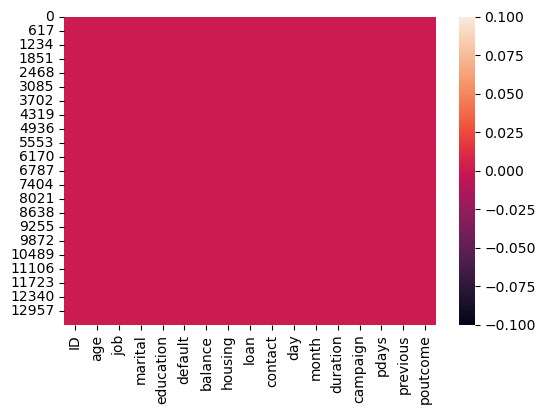

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
# Here we can also check null values with the help of Heatmap
#  here in the heatmap we can clearly see the NO PRESENCE of null vlaues in the given dataset.

CHECKING UNIQUE VALUES PRENSENT IN DATASET & UNIVARIATE ANALYSIS ========================================================================================================================

In [23]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
# 1) # 2)  ANALYSING 'JOB CATEGORY' COLUMN.

In [25]:
df['job'].nunique()
# It is a CATEGORICAL column.

12

In [26]:
df['job'].value_counts()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

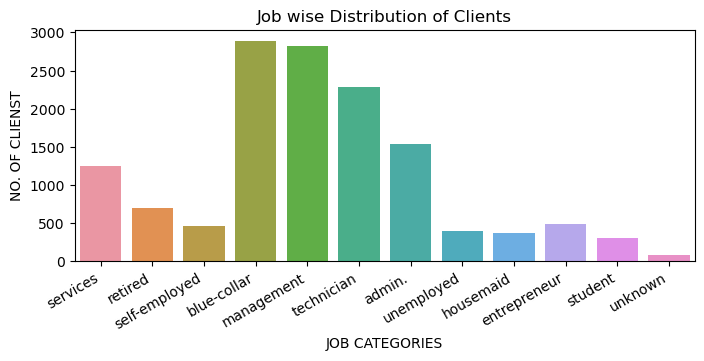

In [29]:
plt.figure (figsize = (8,3), facecolor = "white")
plt.title('Job wise Distribution of Clients')
sns.countplot(x='job', data = df)
plt.xlabel('JOB CATEGORIES', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('NO. OF CLIENST')
# plt.yticks(rotation=30, ha = 'right')

#  Here from the following graph we can clearly find that ,The most of the clients are 'blue-collar' 'Management' 'Technician'
#  and form 'admin' categories few of them are from 'service sector' also.
# very less no. of clients are from 'retired' ' self-employed' 'entrepreneur' 'housemaid' 'student' & 'unknown'

In [ ]:
# 2)  ANALYSING 'MARITIAL STATUS' COLUMN.

In [37]:
df1['marital'].nunique()
#  that means it is a CATEGORICAL COLUMN

3

In [38]:
df1['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

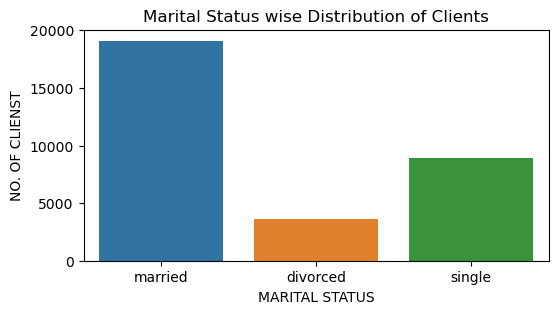

In [39]:
plt.figure (figsize = (6,3), facecolor = "white")
plt.title('Marital Status wise Distribution of Clients')
sns.countplot(x='marital', data = df1)
plt.xlabel('MARITAL STATUS', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('NO. OF CLIENST')
# plt.yticks(rotation=30, ha = 'right')

#  Here from the following graph we can clearly find that ,The most of the clients are MARRIED, then- SINGLE.
#  and form 'admin' categories few of them are from 'service sector' also.
# very less no. of clients are from 'DIVORCED' category.

In [ ]:
# 3)  ANALYSING 'EDUCATION' COLUMN.

In [41]:
df1['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [42]:
df1['education'].nunique()

4

In [45]:
df1['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Text(0, 0.5, 'NO. OF CLIENTS')

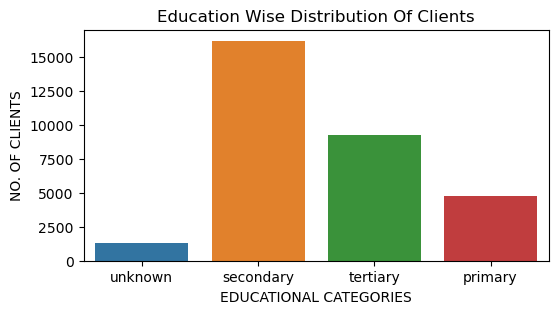

In [47]:
plt.figure(figsize= (6,3),facecolor = "white")
plt.title('Education Wise Distribution Of Clients')
sns.countplot(x='education', data=df1)
plt.xlabel('EDUCATIONAL CATEGORIES')
# plt.xticks(rotation=30, ha='right')
plt.ylabel('NO. OF CLIENTS')
# plt.yticks(rotation=30, ha='right')

# here we can find that most of the cleints are from 'secondary education' category.
#  then it is deacreasing towards 'Tertiary' --> 'Primary'

In [49]:
# 4) ANALYSING 'DEFAULTER' COLUMNS INDIVIDUALLY

In [51]:
df1['default'].unique()
#  It is a categorical column , that weather the client is defaulter or not.

array(['no', 'yes'], dtype=object)

In [53]:
df1['default'].nunique()
# only two categories are there YES/ NO

2

In [54]:
df1['default'].value_counts()
# here we find that, only 585 clients are 'defaluters', wether = 31,062 are not defaulters.

no     31062
yes      585
Name: default, dtype: int64

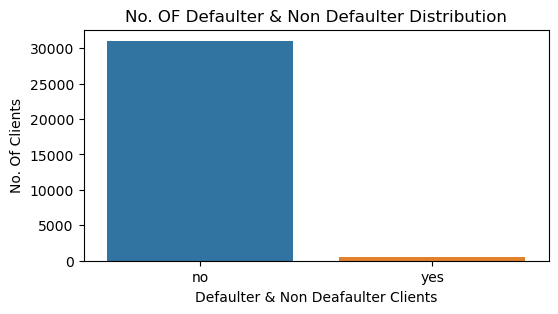

In [55]:
plt.figure(figsize = (6,3), facecolor= "white")
plt.title('No. OF Defaulter & Non Defaulter Distribution')
sns.countplot(x='default',data=df1)
plt.xlabel('Defaulter & Non Deafaulter Clients')
# plt.xticks(rotation=30, ha='right')
plt.ylabel('No. Of Clients')
plt.show()

# Here we can see the clear difference between defaulter and no defaulter clients.
# from the total clients there are only few clients are defaulter.
# most of the clients are non-defaulter.

In [ ]:
# 5) ANALAYING 'HOUSING' COLUMN, that wether the client having existing 'housing loan' or not.

In [57]:
df1['housing'].unique()
# it is also a categorical column, having values in 'yes' or 'no' only

array(['no', 'yes'], dtype=object)

In [58]:
df1['housing'].nunique()

2

In [61]:
df1['housing'].value_counts()

# Out of the Total cllients there are :- YES HAVING HOUSING LOAN = 17584
#                                   NO DON'T HAVING HOUSING LOAN = 14063

yes    17584
no     14063
Name: housing, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

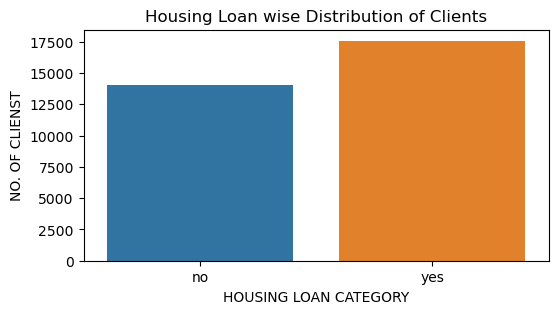

In [62]:
plt.figure (figsize = (6,3), facecolor = "white")
plt.title('Housing Loan wise Distribution of Clients')
sns.countplot(x='housing', data = df1)
plt.xlabel('HOUSING LOAN CATEGORY', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('NO. OF CLIENST')
# plt.yticks(rotation=30, ha = 'right')

#  Here from the following graph we can clearly find that ,The most of the clients are HAVING HOUSING LOAN


In [ ]:
# 6 ) ANALYSING 'LOAN' (PERSONAL LOAN) COLUMN

#    Here we are analysing that , from the dataset howmany no. of clients are having existing 'personal loan'

In [66]:
df1['loan'].unique()
# it is also a categorical column with 'yes' & 'no' vlaues

array(['no', 'yes'], dtype=object)

In [67]:
df1['loan'].value_counts()
# here we finds that how many clients are already having a personal loan

no     26516
yes     5131
Name: loan, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

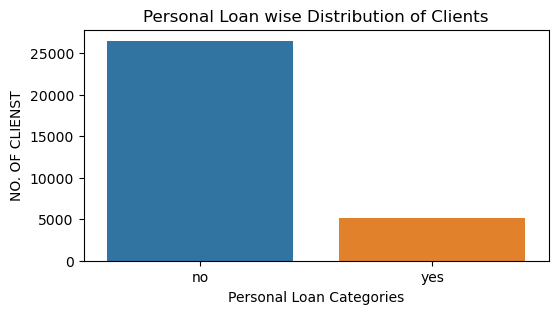

In [68]:
plt.figure (figsize = (6,3), facecolor = "white")
plt.title('Personal Loan wise Distribution of Clients')
sns.countplot(x='loan', data = df1)
plt.xlabel('Personal Loan Categories', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('NO. OF CLIENST')
# plt.yticks(rotation=30, ha = 'right')

#  Here from the following graph we can clearly find that ,The most of the clients are DoNot Having any PERSONAL LOAN from bank
# very less no. of clients are already having a PERSONAL LOAN.

In [ ]:
# 7) ANALYSING 'CONTACT' COLUMN.
#    that how the clients are communicated.

In [71]:
df1['contact'].unique()
#  type of communication with the cclients is through 3 different ways- 'telephone'  'cellular'  'unknown'

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [72]:
df1['contact'].value_counts()

# here we can see that most of the clients are communicated through 'cellular', then by -'unknown',  then 'telephone'
# but here the point is to be highlighted that how can a client is communicated through 'unknow', it might be because the communication
#  source is not defined. may be

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

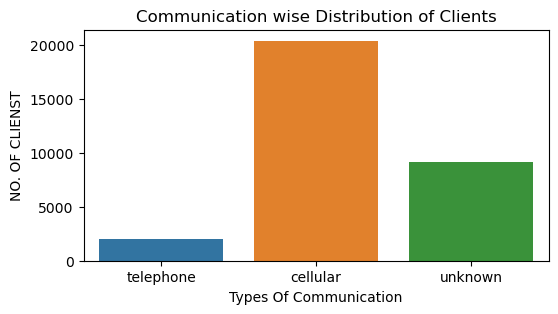

In [74]:
plt.figure (figsize = (6,3), facecolor = "white")
plt.title('Communication wise Distribution of Clients')
sns.countplot(x='contact', data = df1)
plt.xlabel('Types Of Communication', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('NO. OF CLIENST')
# plt.yticks(rotation=30, ha = 'right')

#  Here from the following graph we can clearly find that ,The most of the clients are COMMUNICATED through CELLULAR mode.
#  and form 'Unknown' categories (which may be as a communication mode not defined.) 
# very less no. of clients are communcated by 'telephone' category.

In [76]:
# 8) ANALYSING 'DAY' COLUMN.

#   here we are analysing that on which week days clients are communicatd.

In [77]:
df1['day'].unique()

array([19, 20, 18, 22,  4,  2,  3,  8, 15,  5, 28,  6, 14,  7, 24, 13,  9,
       11, 21, 12, 30, 27, 17, 16, 25, 10,  1, 29, 26, 31, 23],
      dtype=int64)

In [78]:
df1['day'].nunique()
#  here it is also a categorical columns, as we know the highest days in any month is 31.
#  so here also there are 31 unique values are present.

31

In [79]:
df1['day'].value_counts()

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

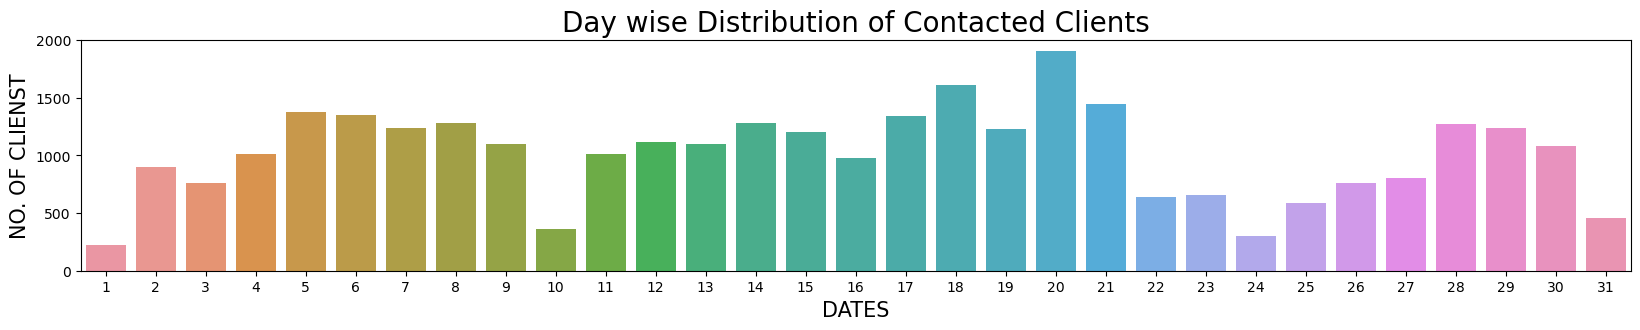

In [84]:
plt.figure (figsize = (20,3), facecolor = "white")
plt.title('Day wise Distribution of Contacted Clients', fontsize = 20)
sns.countplot(x='day', data = df1)
plt.xlabel('DATES', fontsize=15)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('NO. OF CLIENST',fontsize=15)
# plt.yticks(rotation=30, ha = 'right')

#  Here from the following graph we can find that most of the clients are contacted in between 18th -to- 20th
#  we can also say that most of the clients are contacted in between mid of the month.
#  then 'start of the month' --> then 'end of the month'

In [87]:
# 9) ANALYSING 'MONTH' COLUMN.

#   Here we can analysize month wise distribution of contacted clients.

In [88]:
df1['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [89]:
df1['month'].nunique()
# here we are having 12 unique vlaues form month. that mean in each month clients were contacted by the team.

12

In [91]:
df1['month'].value_counts()
# in may. july and august most of the clients are conatacted by the team

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

Text(0, 0.5, 'NO. OF CLIENST')

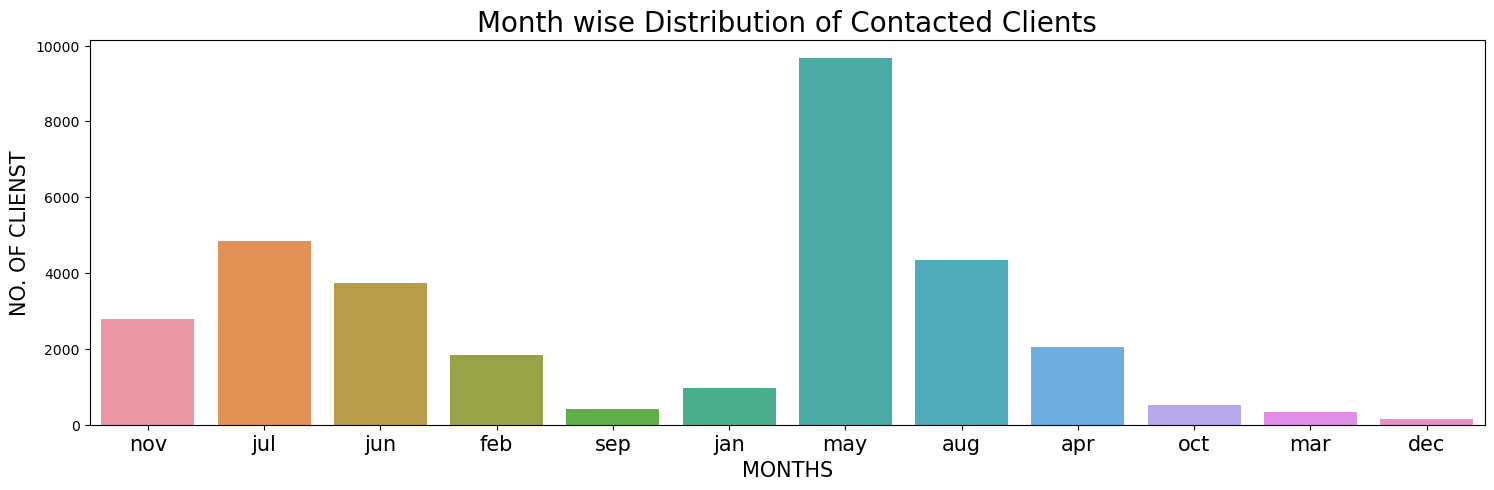

In [102]:
plt.figure (figsize = (18,5), facecolor = "white")
plt.title('Month wise Distribution of Contacted Clients',fontsize=20)
sns.countplot(x='month', data = df1)
plt.xlabel('MONTHS', fontsize=15)
plt.xticks(rotation=0, ha = 'center', fontsize=15)
plt.ylabel('NO. OF CLIENST', fontsize=15)
# plt.yticks(rotation=30, ha = 'right')

# here we can clearly say that in the month of 'JULY'  'MAY' & 'AUGUST' MXAXIMUM CLIENTS are contacted by the team.  

In [110]:
df1.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [ ]:
# 10) ANALYSING 'DURATION' COLUMN.

#               Here we analysing the 'duration', that mean how time is given by the client to the team
#               more given time, that mean the client is much more intrested to understand the scheme.
#               that is a positive relationship

Text(0, 0.5, 'NO. OF CLIENST')

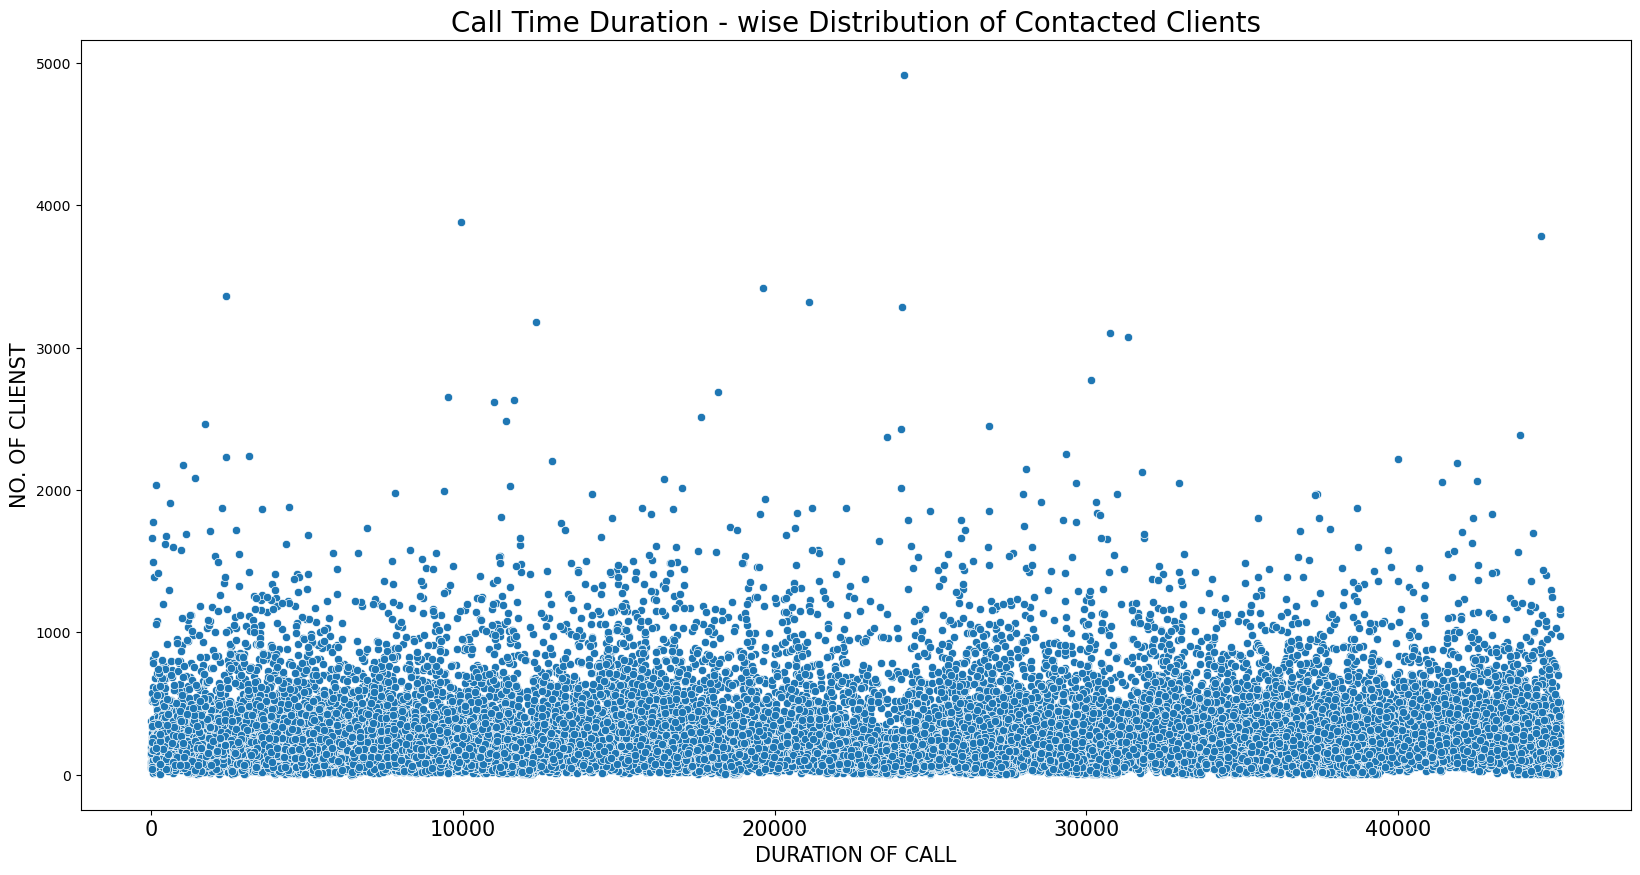

In [118]:
plt.figure (figsize = (20,10), facecolor = "white")
plt.title('Call Time Duration - wise Distribution of Contacted Clients',fontsize=20)
sns.scatterplot(x='ID', y='duration', data = df1)
plt.xlabel('DURATION OF CALL', fontsize=15)
plt.xticks(rotation=0, ha = 'center', fontsize=15)
plt.ylabel('NO. OF CLIENST', fontsize=15)
# plt.yticks(rotation=30, ha = 'right')

# Here we can see in the following graph that maximum number of clients call duration in between 0 to 1000 seconds.
# only few of the clients are having call duration more hten 3000 seconds.

In [ ]:
# 11) ANALYSING 'CAMPAIGN' COLUMN.

#                  Here we can analysize that how many no. of contacts performed during the capmaign to the client.

In [120]:
df1['campaign'].unique()

array([ 2,  1,  3,  4,  7,  5, 33, 12,  8,  9,  6, 24, 17, 11, 20, 25, 19,
       29, 21, 10, 27, 38, 16, 18, 14, 30, 13, 15, 63, 23, 31, 43, 35, 22,
       34, 28, 26, 41, 37, 50, 55, 32, 44, 36, 39], dtype=int64)

In [121]:
df1['campaign'].nunique()
#  there are 45 numbers of unique values are present.

45

In [122]:
df1['campaign'].max()
#  here we can find that the maximum number of approch to a client is 63, which is considered as very high approach.

63

In [123]:
df1['campaign'].min()
#  offcourse minimum no . of approaches to the client is must be 1.

1

In [124]:
df['campaign'].value_counts()
#  Here we can see that maximum numbers of clients are approched between 1 -to- 4 times by the team.

1     5282
2     3707
3     1663
4     1080
5      519
6      375
7      217
8      184
9       91
10      82
11      75
12      53
13      40
16      25
14      25
15      23
17      17
21      16
18      14
19      14
23       9
24       7
20       6
22       5
25       5
29       4
26       4
36       3
31       3
32       3
27       2
28       2
30       2
50       1
33       1
46       1
41       1
58       1
35       1
51       1
Name: campaign, dtype: int64

Text(0, 0.5, 'NO. OF CONTACTS TO CLIENT')

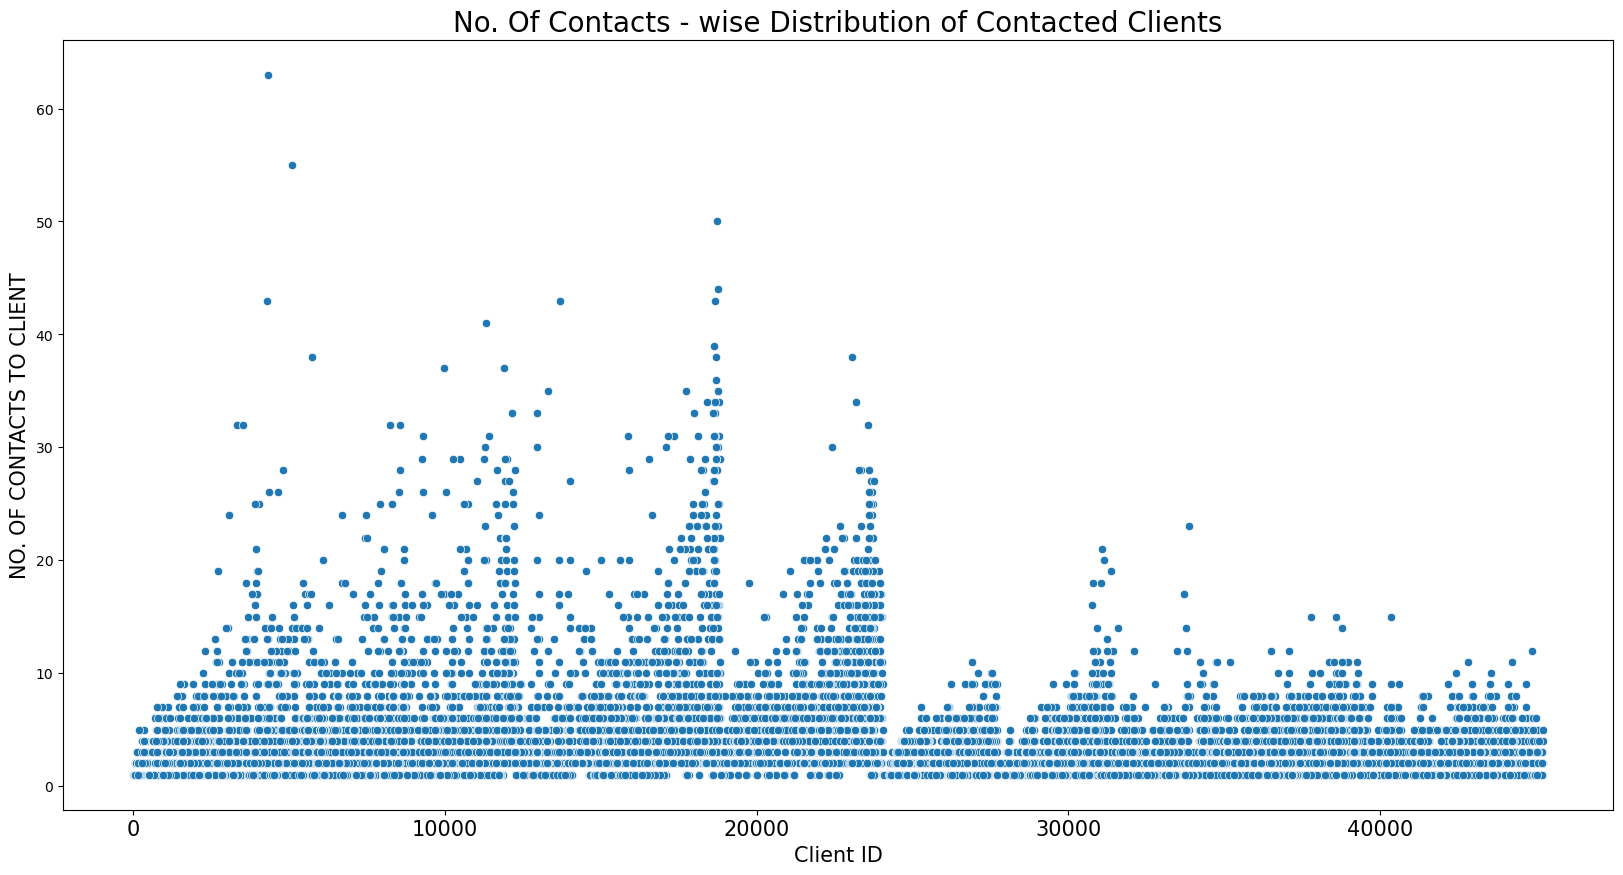

In [127]:
plt.figure (figsize = (20,10), facecolor = "white")
plt.title('No. Of Contacts - wise Distribution of Contacted Clients',fontsize=20)
sns.scatterplot(x='ID', y='campaign', data = df1)
plt.xlabel('Client ID', fontsize=15)
plt.xticks(rotation=0, ha = 'center', fontsize=15)
plt.ylabel('NO. OF CONTACTS TO CLIENT', fontsize=15)
# plt.yticks(rotation=30, ha = 'right')

# Here we can see in the following graph that maximum number of clients were contacted by 1-10 times.
# only few of the clients are having call duration more hten 3000 seconds.
# some of the clients were conacted by 10 - 30 times.
#  and few of the clients were contacted above 30 times.
#  maximum number of contact done to a client is 63 times.

In [ ]:
# 12) ANALYSING 'PDAYS' COLUMNS.

#           here we analysizing how many number of days that passed by after the client was last contacted.

In [131]:
df1['pdays'].nunique()
#  there are 509 unique values are present in the column.

509

In [132]:
df1['pdays'].value_counts()
# the maximum number of clients is on -1, that means they may contacted by less then 1 day.
#  by this we can say that team is working good.

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64

<AxesSubplot:title={'center':'Days Passed After The Last Conact'}, xlabel='pdays', ylabel='Count'>

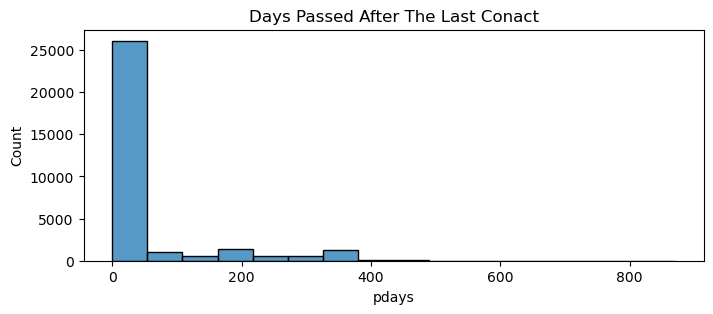

In [137]:
plt.figure(figsize= (8,3), facecolor= "white")
plt.title('Days Passed After The Last Conact')
sns.histplot(df1['pdays'])
# here by histogram also we can say maximum numbers of clients are contacted recently (less then 1 day)

In [ ]:
# 13) ANALYSING 'PREVIOUS' COLUMN

#              Here in the 'previous' column we can analyse that , how many number of contacts performed before the campaign.

In [139]:
df1['previous'].unique()

array([  0,   3,   2,   4,   1,   5,   9,   6,   8,  11,  16,  10,  14,
         7,  12,  23,  13,  18,  30,  27, 275,  20,  15,  17,  19,  22,
        25,  26,  28,  29,  32,  21,  24,  38,  58,  35,  41,  37],
      dtype=int64)

In [140]:
df1['previous'].nunique()
#  there are 38 uniques values present in the column.

38

In [141]:
df1['previous'].value_counts()
#  there are 25,924 clients are not conatcted before this campaign
#  there are 1921+1481 = 3402 clients are conatced by 1- 2 times before this campaign
#  here in the following we are also get a single value '275', that means 1 client is conatcted by 275 times, 
#                                                              we can say him an outliers, or may be typing mistake in data.

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64

Text(0, 0.5, 'Contacts Performed Before the Campaign')

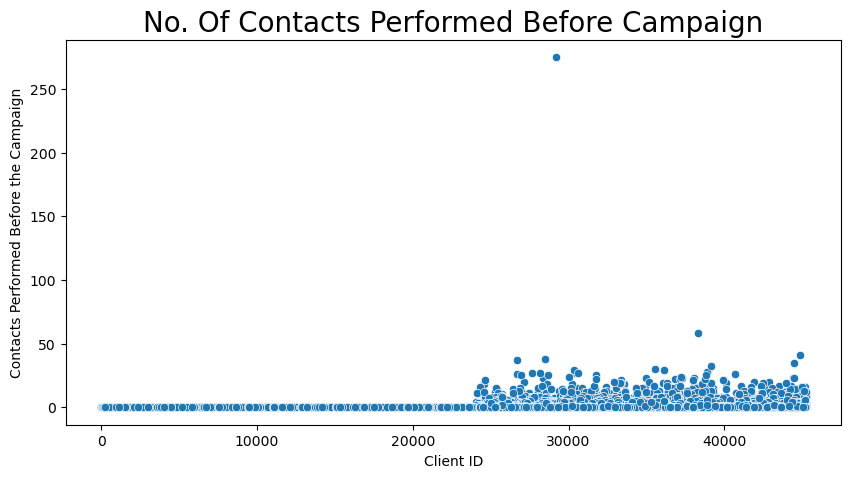

In [145]:
plt.figure (figsize = (10,5), facecolor = "white")
plt.title('No. Of Contacts Performed Before Campaign',fontsize=20)
sns.scatterplot(x='ID', y='previous', data = df1)
plt.xlabel('Client ID', fontsize=10)
plt.xticks(rotation=0, ha = 'center', fontsize=10)
plt.ylabel('Contacts Performed Before the Campaign', fontsize=10)
# plt.yticks(rotation=30, ha = 'right')

# Here we can see in the following graph that maximum number of clients were NOT-Contacted before this campaign.
# only few of the clients are conatcted.
# there is also a OUTLIERS may present here, which can be check further.

In [ ]:
# 14)  ANALYSING 'POUTCOME' COLUMN.
#                        here we are analysing the previous campaign results.

In [147]:
df1['poutcome'].unique()
# here we can find that 'poutcome' is a categorical column.
#  and it is showing the result of the previous campain.
#  by which we can find the result of the previous campain.
#  And the succefully converted clients may not be contacted again for the same campaign.

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [148]:
df1['poutcome'].nunique()
# therre are 4 categories in this column.

4

In [149]:
df['poutcome'].value_counts()
# By this we can find that , by previous camaign team converted only 443 clients.

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64

Text(0, 0.5, 'NO. OF CLIENT')

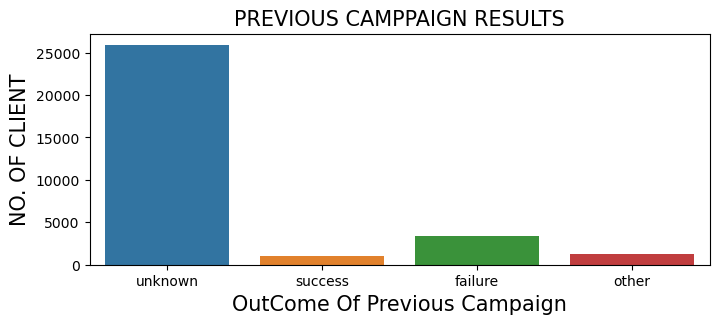

In [154]:
plt.figure (figsize = (8,3), facecolor = "white")
plt.title('PREVIOUS CAMPPAIGN RESULTS',fontsize=15)
sns.countplot( x='poutcome', data = df1)
plt.xlabel('OutCome Of Previous Campaign', fontsize=15)
plt.xticks(rotation=0, ha = 'center', fontsize=10)
plt.ylabel('NO. OF CLIENT', fontsize=15)
# plt.yticks(rotation=30, ha = 'right')

# Here we can see in the following graph that PREVIOUS CAMPAIGN is not succefull.
#  beacuse only few of the clients are converted during the previous campaign.

In [156]:
#  15) ANALYSING 'SUBSCRIBED' COLUMN.
#                          here we are analysing how many clients are converted after this campaign.

In [158]:
df1['subscribed'].unique()
# offcourse it a categorical column having values in YES/NO

array(['no', 'yes'], dtype=object)

In [159]:
df1['subscribed'].nunique()

2

In [160]:
df1['subscribed'].value_counts()
# this campaign is also not so good, beacuse only 3715 clients are converted after the campaign.
# therefore PORTUGUESS BANK is WORRIED and approching to us. 

no     27932
yes     3715
Name: subscribed, dtype: int64

Text(0, 0.5, 'NO. OF CLIENT')

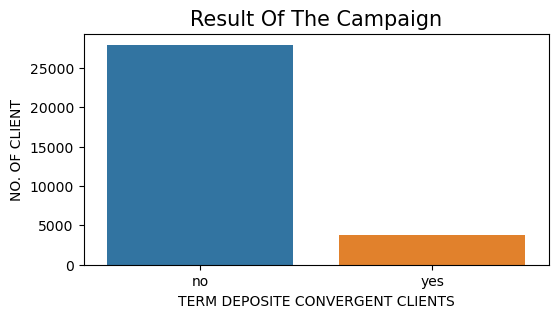

In [166]:
plt.figure (figsize = (6,3), facecolor = "white")
plt.title('Result Of The Campaign',fontsize=15)
sns.countplot(x='subscribed', data = df1)
plt.xlabel('TERM DEPOSITE CONVERGENT CLIENTS', fontsize=10)
# plt.xticks(rotation=0, ha = 'center', fontsize=6)
plt.ylabel('NO. OF CLIENT', fontsize=10)
# plt.yticks(rotation=30, ha = 'right')

# Here we can see in the following graph that only few of the clients are get converted for the TERM-DEPOSITE
# Most of the clients are in the NON COVERGENT CATEGORY.

BIVARIATE ANALYSIS / MUTIVARIATE ANALYSIS ==========================================================================================================

In [ ]:
#  here in the BIVARIATE ANALYSIS we can analysize two columns

CONVERTING TARGET COLUMN INTO NUMERICAL =======================================================================================

In [191]:
# here we are converting our Target Column into Numerical form, because for bivsriate or Multivariate analysis we need to
#  convert Target Column from object --> to --> integer type

In [189]:
from sklearn.preprocessing import LabelEncoder

In [192]:
le = LabelEncoder()

In [193]:
df1["subscribed"].dtypes
# 'object' datatype

dtype('O')

In [194]:
df1["subscribed"].head(10)

0     no
1     no
2     no
3    yes
4     no
5     no
6    yes
7     no
8     no
9     no
Name: subscribed, dtype: object

In [195]:
df1["subscribed"] = le.fit_transform(df1["subscribed"])

In [197]:
df1["subscribed"].head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: subscribed, dtype: int32

In [198]:
df1["subscribed"].dtypes
# here we convert datatype of Target column from object to integer

dtype('int32')

In [201]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

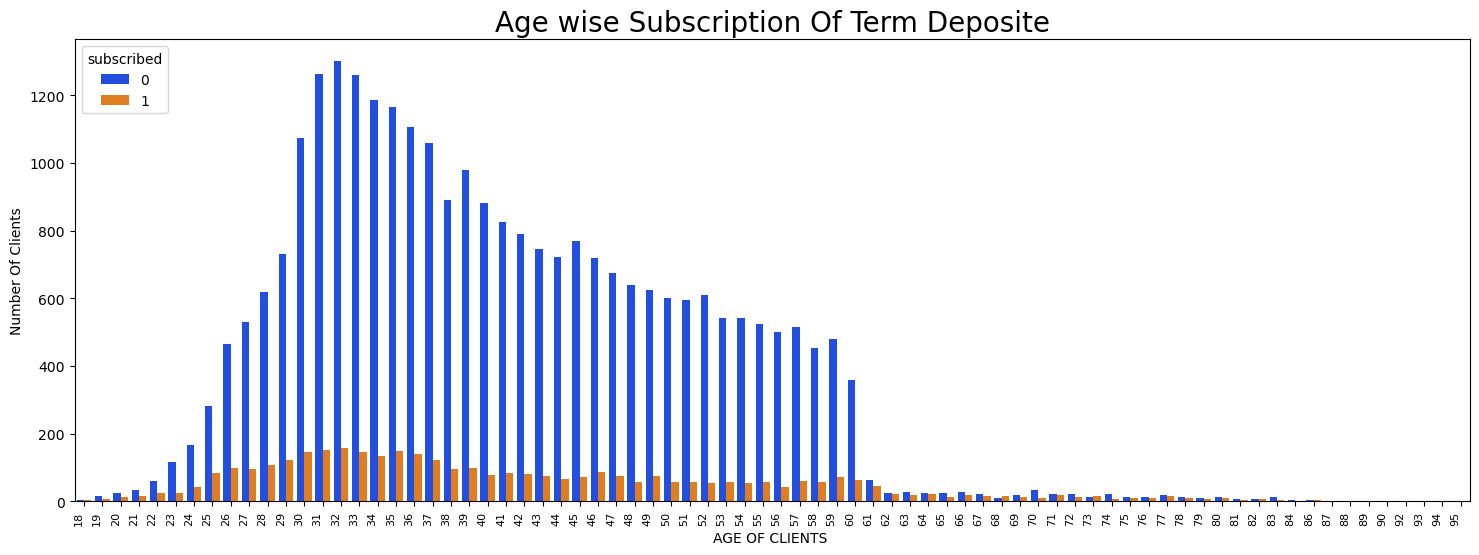

In [251]:
plt.figure(figsize=(18,6),facecolor="white")
plt.title('Age wise Subscription Of Term Deposite',fontsize=20)
sns.countplot (x= 'age', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('AGE OF CLIENTS ')
plt.xticks(rotation=90, ha='right',fontsize=8)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that the more young people of age between 25-40 is Subscribed more termdeposite as
#  compared to other age group people.

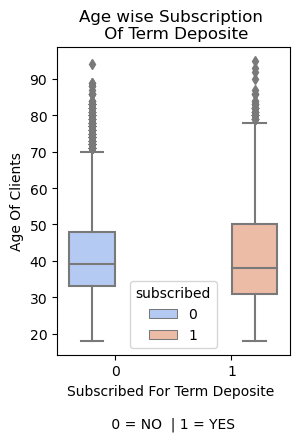

In [232]:
plt.figure(figsize=(3,4),facecolor="white")
plt.title('Age wise Subscription \n Of Term Deposite')
sns.boxplot (x= 'subscribed', y = 'age', hue = 'subscribed', data= df1, palette = "coolwarm")
plt.xlabel ('Subscribed For Term Deposite \n\n 0 = NO  | 1 = YES ')
plt.ylabel('Age Of Clients')
plt.show()


#  here we can clearly saw that the Higher-age clients are also converted for TERM-DEPOSITE

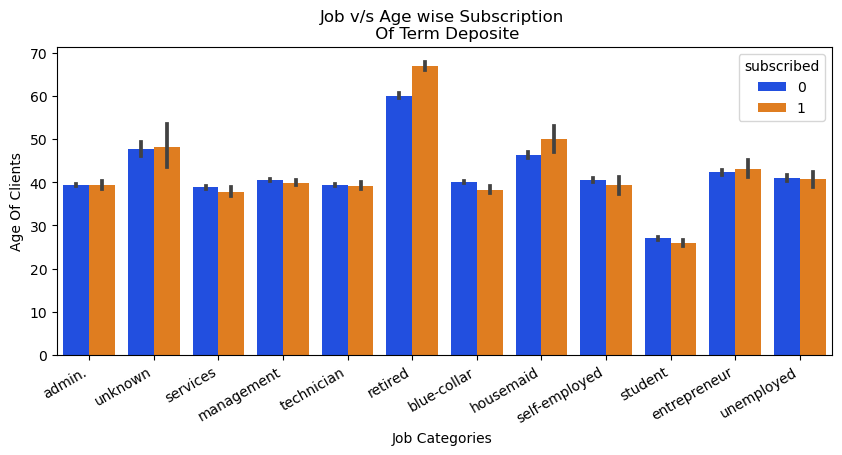

In [242]:
plt.figure(figsize=(10,4),facecolor="white")
plt.title('Job v/s Age wise Subscription \n Of Term Deposite')
sns.barplot (x= 'job', y = 'age', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('Job Categories ')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Age Of Clients')
plt.show()


#  here from the following graph we can say that, most of the higher age clients who opt the TERM-DEPOSITE are retired.

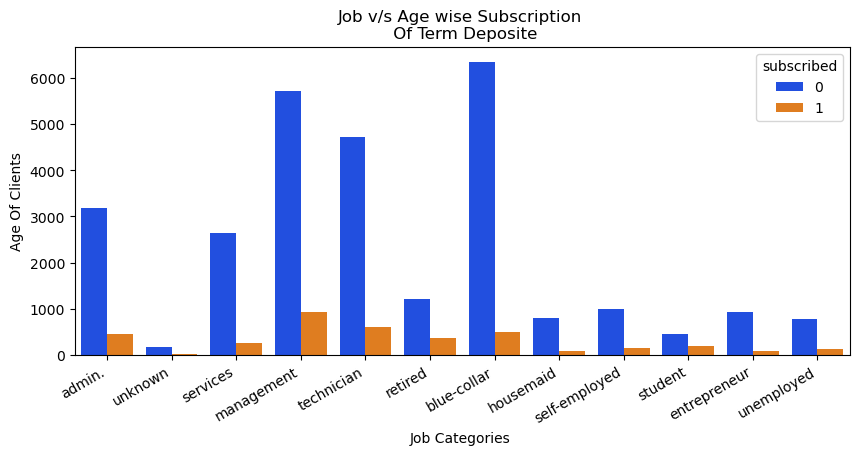

In [244]:
plt.figure(figsize=(10,4),facecolor="white")
plt.title('Job Categorie wise Subscription \n Of Term Deposite')
sns.countplot (x= 'job', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('Job Categories ')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Number Of Clients')
plt.show()


#  here from the following graph we can say that,
#  herrarchie in decending order to opt TERM-DEPOSITE IS :'Management'-->'Techinician'--> 'Blue-collar''-->admin'-->'retired'

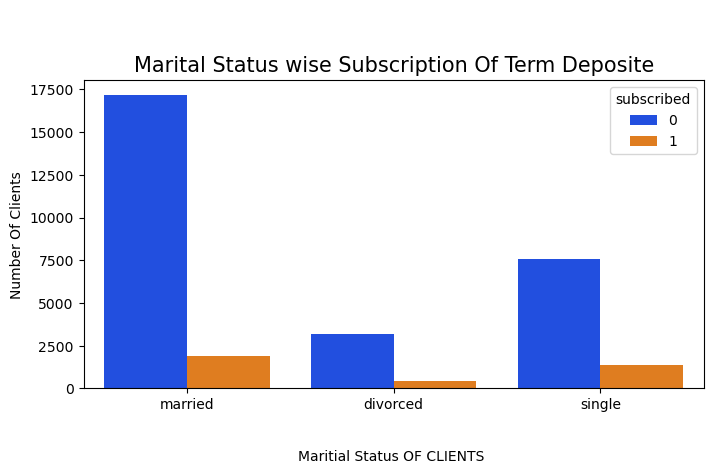

In [262]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('\n\nMarital Status wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'marital', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('\n\nMaritial Status OF CLIENTS ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that 'Married' & 'Single' clients are more subscribed for term deposite, as compared
#  to divorced

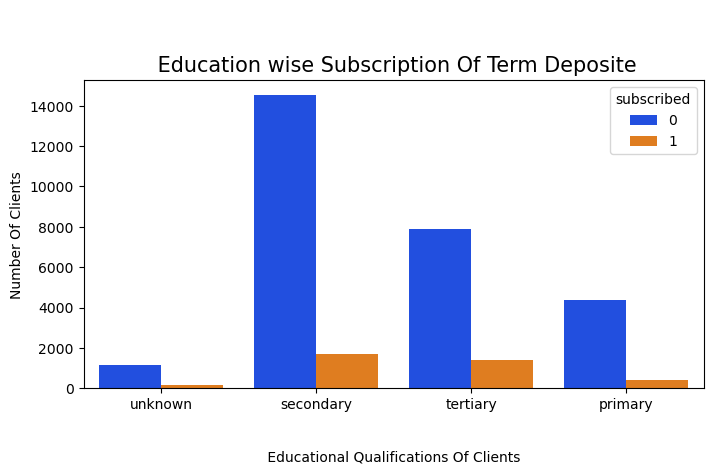

In [266]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('\n\n Education wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'education', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('\n\n Educational Qualifications Of Clients ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that 'Secondary' & 'Tertiary' educated people subscribed more for term-deposite
#  as compare to other educational categorie people.

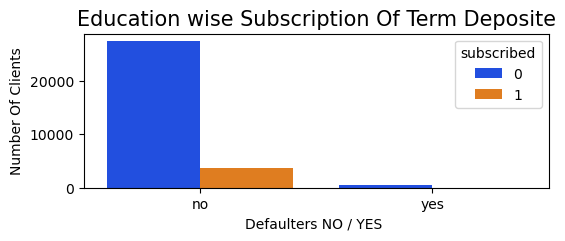

In [269]:
plt.figure(figsize=(6,2),facecolor="white")
plt.title('Education wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'default', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('Defaulters NO / YES ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that only NOT DEFAULTER clients are subscribed for the Term-Deposite.
#  offcourse how can a defaulter sbcribed for the term-deposite.

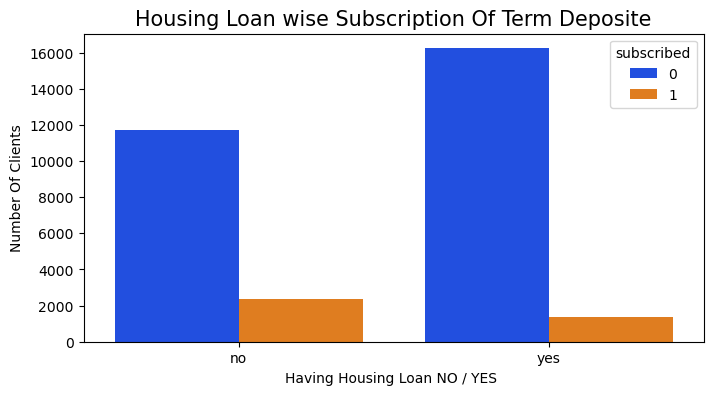

In [271]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('Housing Loan wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'housing', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('Having Housing Loan NO / YES ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that NO HOUSING LOAN CLIIENTS are subscribed more as compared to YES HOUSING LOAN CLIENTS 
#  from this we can also conclude that, the client who already have a Housing loan EMI is Less intrested in term-deposite

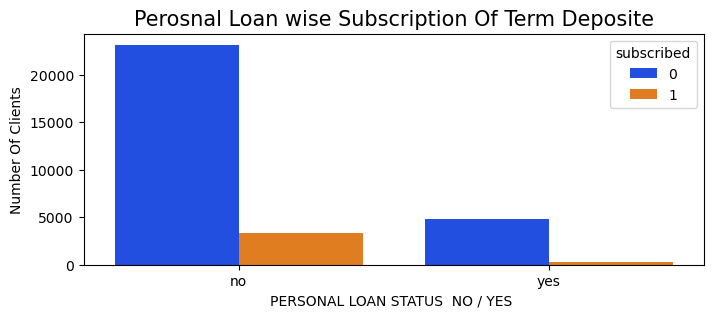

In [274]:
plt.figure(figsize=(8,3),facecolor="white")
plt.title('Perosnal Loan wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'loan', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('PERSONAL LOAN STATUS  NO / YES ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that the clients who are already having a personal loan, are less intrested to 
#  in subscribing term-deposite.
# it is ofbvious because we  know that the personal loans are having higher intrest rate then any other loan.
#  therfore the clients who are already having personal loan are verymuch less in count.

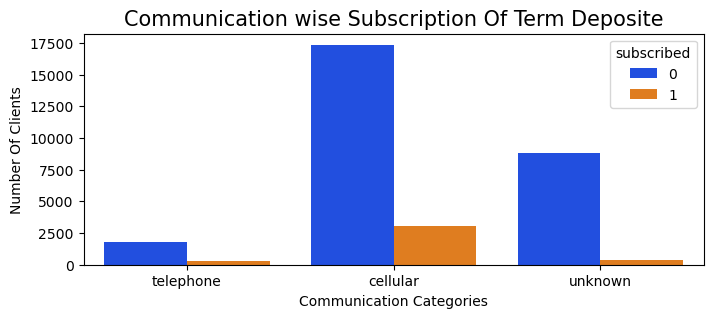

In [277]:
plt.figure(figsize=(8,3),facecolor="white")
plt.title('Communication wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'contact', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('Communication Categories')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that the clients who are contacted through cellular mode are more subscribed then 
#  any other sources.

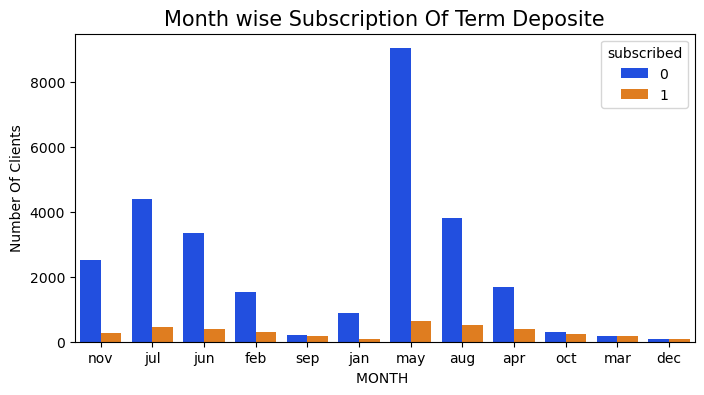

In [294]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('Month wise Subscription Of Term Deposite',fontsize=15)
sns.countplot (x= 'month', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('MONTH ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Number Of Clients')
plt.show()


# Here from the below graph we can say that in the month of 'APRIL' 'MAY' 'JUN' 'JULY' 'AUG' the conversion rate is good
#  as compared to other months.

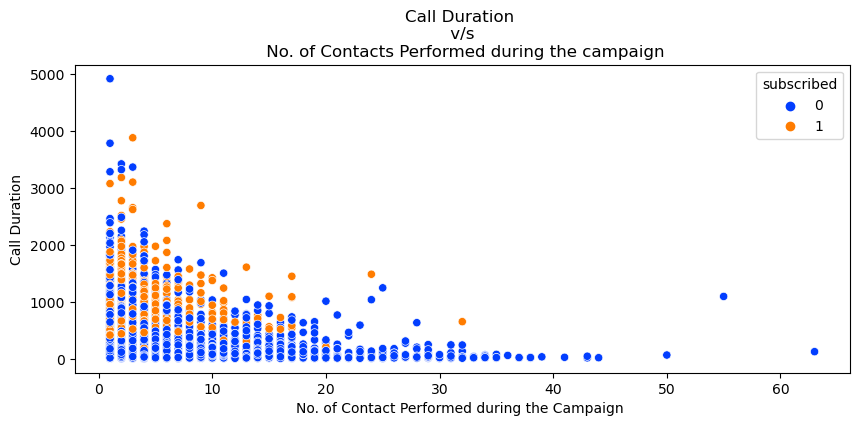

In [329]:
plt.figure(figsize=(10,4),facecolor="white")
plt.title('Call Duration \n v/s \n No. of Contacts Performed during the campaign')
sns.scatterplot (x= 'campaign', y = 'duration', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('No. of Contact Performed during the Campaign ')
# plt.xticks(rotation=30, ha='right')
plt.ylabel('Call Duration')
plt.show()


#  here from the following graph we can say that, Call Duration more effectivelys works in conversion as compared to No. of contacts.
#  more numbers of contact doesn't mean effective in the conversion.

In [339]:
df1['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

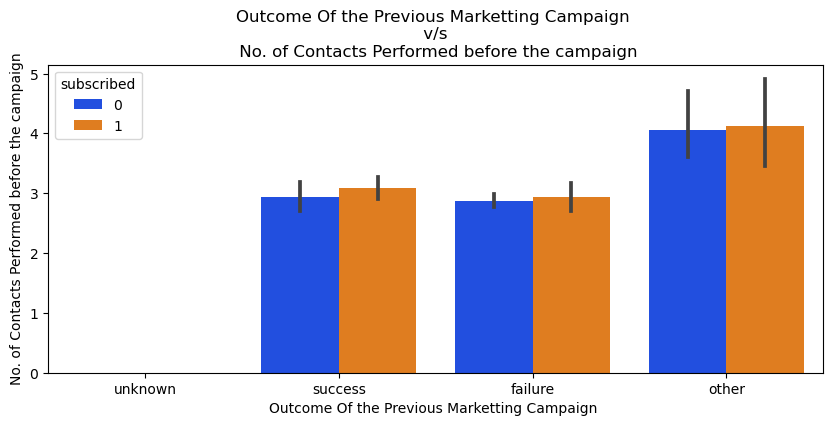

In [344]:
plt.figure(figsize=(10,4),facecolor="white")
plt.title('Outcome Of the Previous Marketting Campaign \n v/s \n No. of Contacts Performed before the campaign')
sns.barplot (x= 'poutcome',y= 'previous', hue = 'subscribed', data= df1, palette = "bright")
plt.xlabel ('Outcome Of the Previous Marketting Campaign ')
# plt.xticks(rotation=30, ha='right')
plt.ylabel('No. of Contacts Performed before the campaign')
plt.show()




In [357]:
df1.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,1970-01-01 00:00:00.000000019,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,1970-01-01 00:00:00.000000020,jul,91,2,-1,0,unknown,0


In [358]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

DROPPING SOME IRRELEVANT COUMNS ==============================================================================================

In [362]:
df1_new = df1[['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed']]

#  here we are dropping following columns 'ID', 'day', 'month'

In [364]:
df1_new.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,91,2,-1,0,unknown,0


In [366]:
df1_new["job"] = le.fit_transform(df1_new["job"])
df1_new["marital"] = le.fit_transform(df1_new["marital"])
df1_new["education"] = le.fit_transform(df1_new["education"])
df1_new["default"] = le.fit_transform(df1_new["default"])
df1_new["housing"] = le.fit_transform(df1_new["housing"])
df1_new["loan"] = le.fit_transform(df1_new["loan"])
df1_new["contact"] = le.fit_transform(df1_new["contact"])
df1_new["poutcome"] = le.fit_transform(df1_new["poutcome"])

In [367]:
df1_new.head(2)
# here we can see that we are succesfully transform all 'object' columns into numerical.

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,91,2,-1,0,3,0


In [368]:
df1_new.dtypes
#  here we can see that our all columns are in integer form

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

CHECKIN FOR OUTLIERS =======================================================================================================

In [371]:
df1_new.shape

(31647, 15)

In [370]:
df1_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

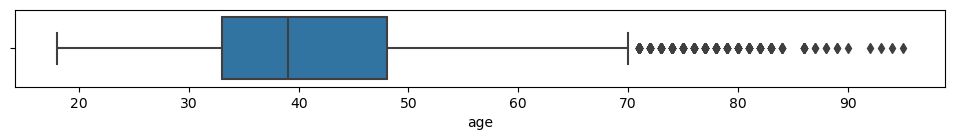

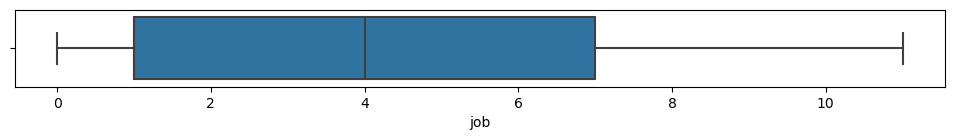

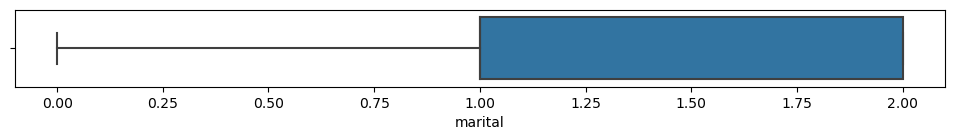

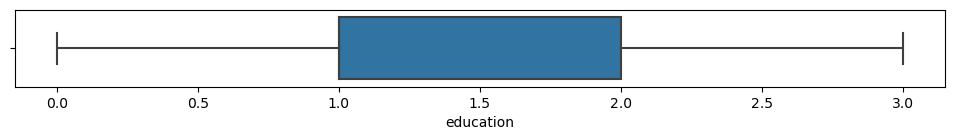

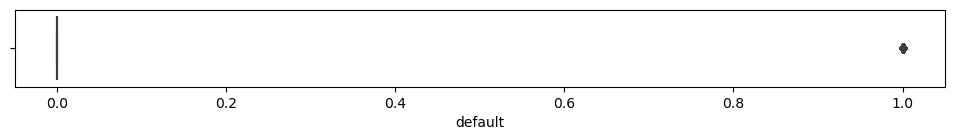

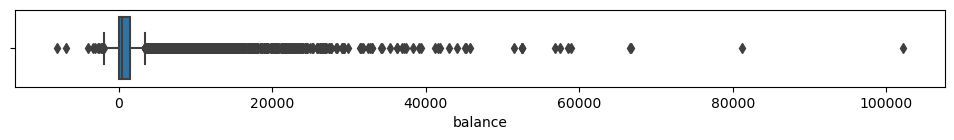

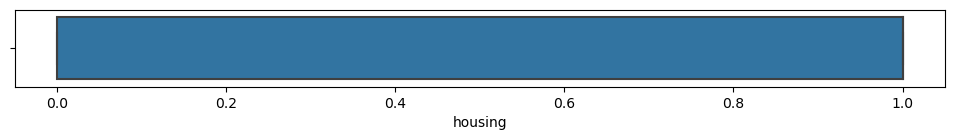

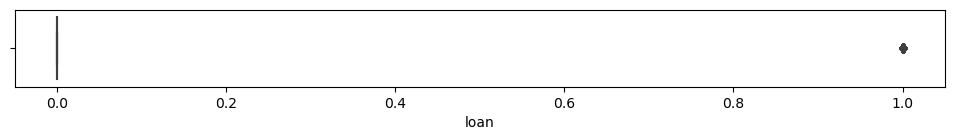

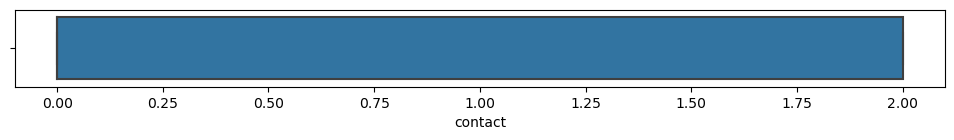

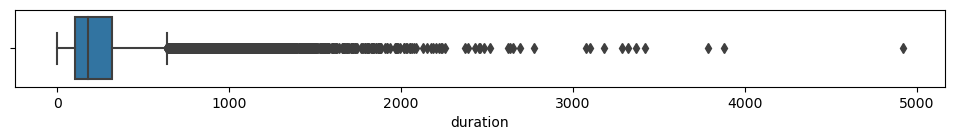

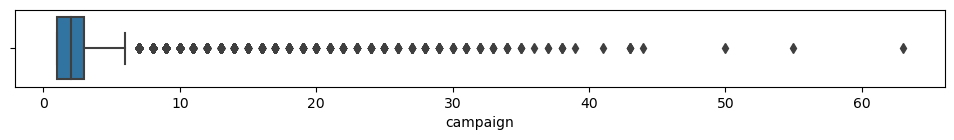

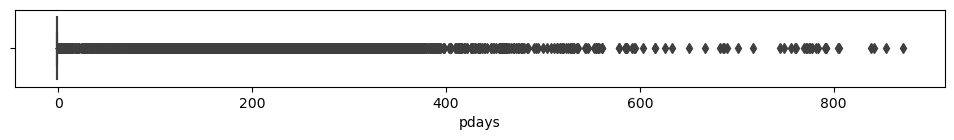

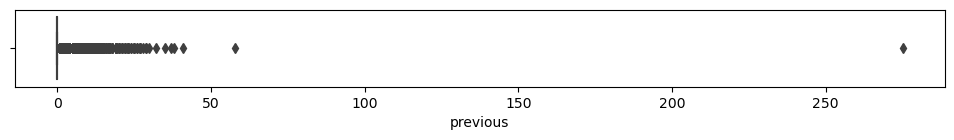

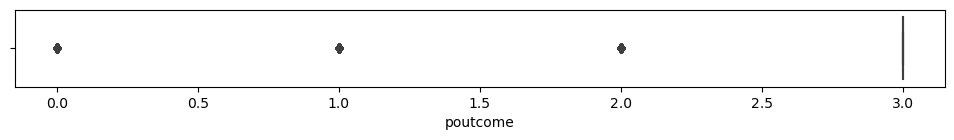

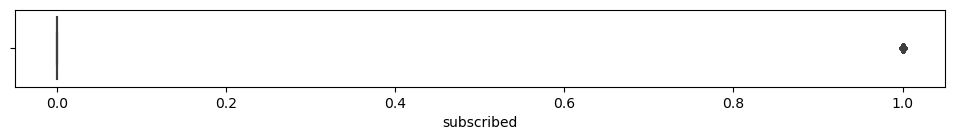

In [372]:
for i in df1_new.columns[0:15]:
    plt.figure (figsize = (12,1), facecolor = "white")
    sns.boxplot(x=i,data=df1_new)
    plt.show()
    
#     here below we can find the outliers for all the cloumns by using boxplot.
#  and we are found outliers in :
#  age, default, balance, loan, duration, campaign, pdays,previous, poutcome
# so out of 15 columns we found OUTLIERS IN 9 COLUMNS , now we have to remove those outliers from out dataset.

APPLYING Z-SCORE =================================================================================================>>>>>>>>>

In [ ]:
#  to remove outliers present in the dataset, we have to apply Z-Score Technique

In [374]:
from scipy.stats import zscore

In [375]:
z = np.abs(zscore(df1_new))
z.head(5)

# by applying 'abs' (absolute method), we are getting all the entries whose z-score value is positive side
#  Ideally we can call the OUTLIERS whos ZSCORE VALUE is LESS THEN 3 AND MORE THEN 3
# so we have to remove all the data whose ZSCORE >3 & <3
#  below here we apllying "abs" i.e absolute method it returns us the all zscore values greater then 3
#  so we just need to remove lesserr then 3 zscore values.

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694


In [376]:
threshold = 3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 10,  5, ..., 11, 12,  9], dtype=int64))


In [377]:
df2_new = df1_new[(z<3).all(axis=1)]
df2_new

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,438,2,-1,0,3,1


In [378]:
df2_new.shape

(27584, 15)

In [379]:
df1_new.shape

(31647, 15)

In [ ]:
# here you can see that there is difference of 4063,
#  so here we dropped those values whose z-score is >3

CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING  'df1_new'  &  'df2_new') =======================================================================================================================

In [382]:
df2_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
# Here as above we was founded outliers in the below 15 columns,
#  so now we are comparing those 15 columns, before removing & after removing of outliers.
#  'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
#        'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
#        'poutcome', 'subscribed'

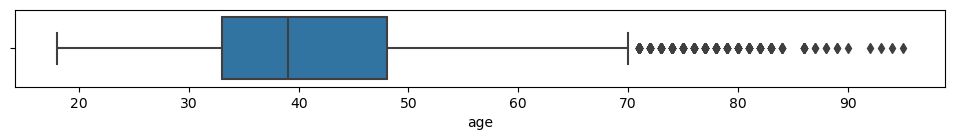

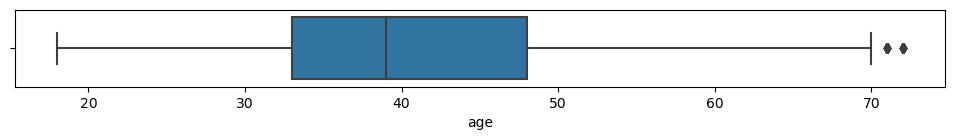

In [383]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='age',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='age',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

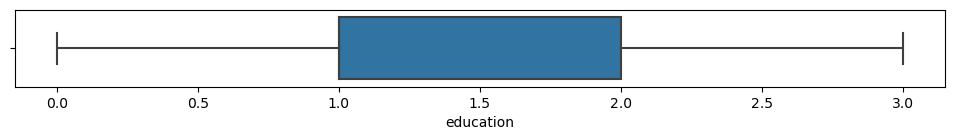

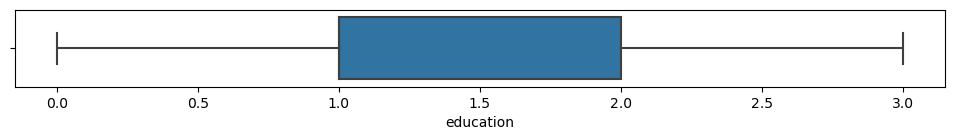

In [385]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='education',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='education',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

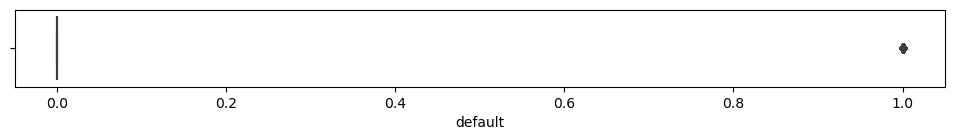

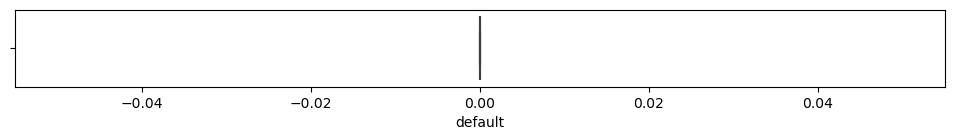

In [386]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='default',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='default',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

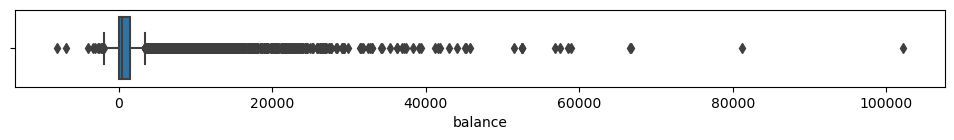

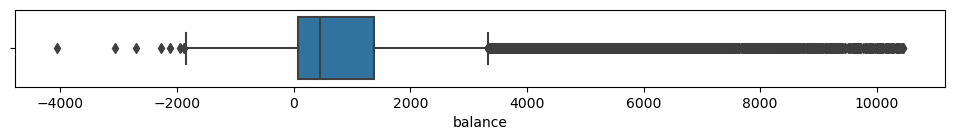

In [387]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='balance',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='balance',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

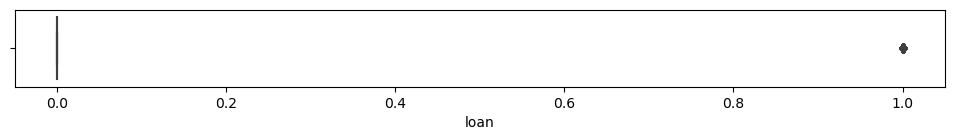

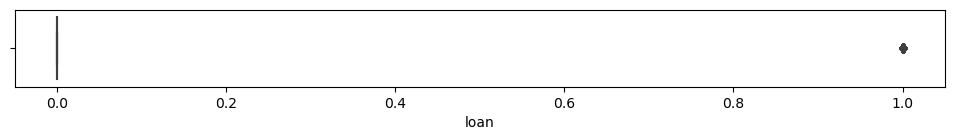

In [389]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='loan',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='loan',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

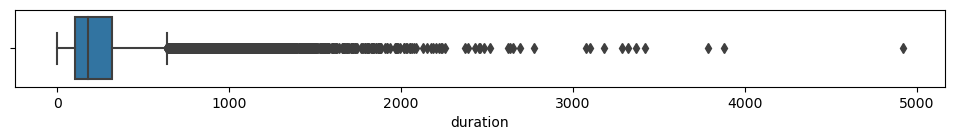

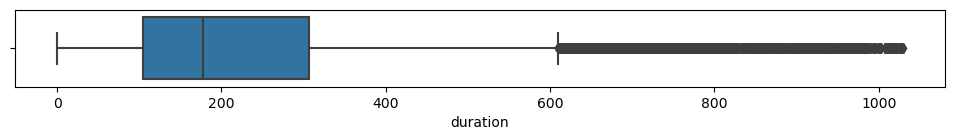

In [391]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='duration',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='duration',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

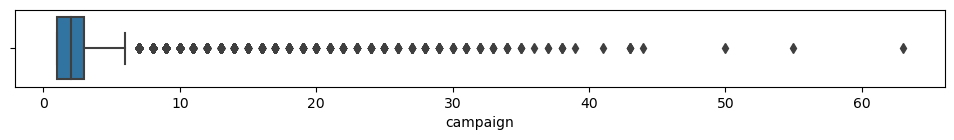

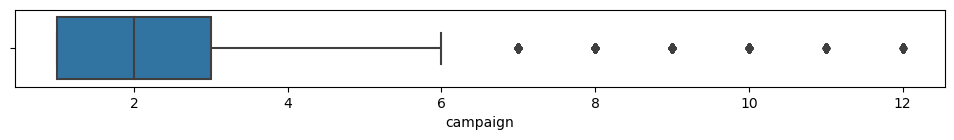

In [392]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='campaign',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='campaign',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

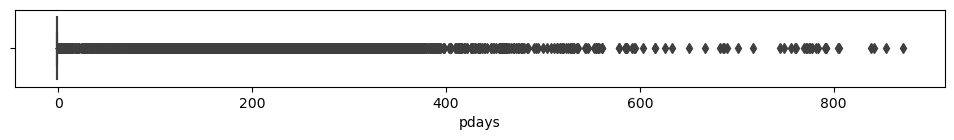

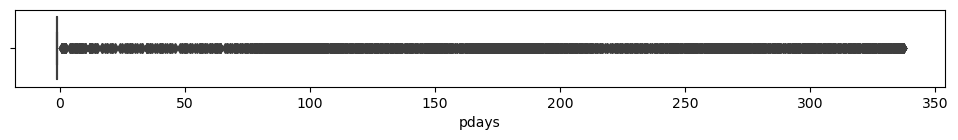

In [393]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pdays',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pdays',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

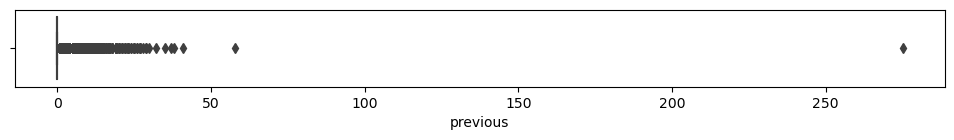

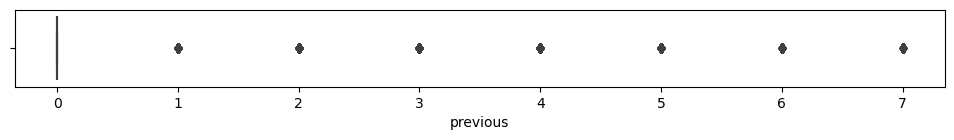

In [394]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='previous',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='previous',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

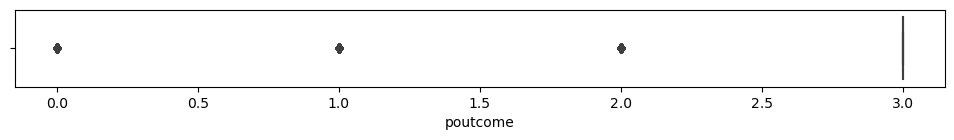

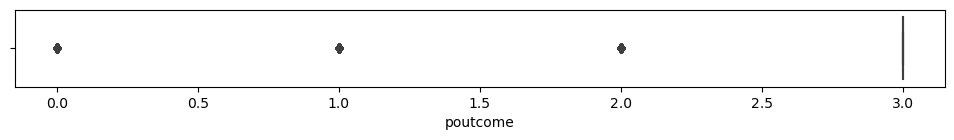

In [395]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='poutcome',data=df1_new)
plt.show()

# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='poutcome',data=df2_new)
plt.show()

# outliers are succesfully removed.
# it is the EARLIER (df dataset) PRESENCE OF OUTLIERS

CHECKING SKEWNESS 
============================================================================================================>>>

In [399]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
#  ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column

In [400]:
df2_new.skew()
#  here we can't see skewness in our dataset.

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance       2.433928
housing      -0.207765
loan          1.829242
contact       0.698882
duration      1.596175
campaign      2.064222
pdays         2.799415
previous      3.657231
poutcome     -2.449518
subscribed    2.624756
dtype: float64

In [ ]:
# here we can see the skewness is present in 'balance' 'loan' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
#  so we need to remove skewness from those mentioned columns.

In [401]:
# so we have to remove skewness from those columns by using 'cuberoot' method.

In [403]:
df2_new['balance'] = np.cbrt(df2_new['balance'])

In [407]:
df2_new['loan'] = np.cbrt(df2_new['loan'])

In [408]:
df2_new['duration'] = np.cbrt(df2_new['duration'])

In [409]:
df2_new['campaign'] = np.cbrt(df2_new['campaign'])

In [410]:
df2_new['pdays'] = np.cbrt(df2_new['pdays'])

In [411]:
df2_new['previous'] = np.cbrt(df2_new['previous'])

In [412]:
df2_new['poutcome'] = np.cbrt(df2_new['poutcome'])

In [413]:
df2_new.skew()
# here we can see that skewness of most of the columns has removed succesfully.

age           0.439159
job           0.258302
marital      -0.095968
education     0.197092
default       0.000000
balance      -0.418041
housing      -0.207765
loan          1.829242
contact       0.698882
duration      0.309191
campaign      0.999357
pdays         2.162491
previous      2.275265
poutcome     -2.868674
subscribed    2.624756
dtype: float64

In [417]:
df2_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')

In [419]:
df3_new = df2_new[['age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed']]

In [420]:
df3_new.head(2)

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,12.456918,0,0.0,1,3.530348,1.259921,-1.0,0.0,1.44225,0
1,31,11,1,1,1.442250,0,0.0,0,4.497941,1.259921,-1.0,0.0,1.44225,0


FINDING CORRELATION (GRAPHICALLY) ===========================================================================================

In [423]:
cor = df3_new.corr()

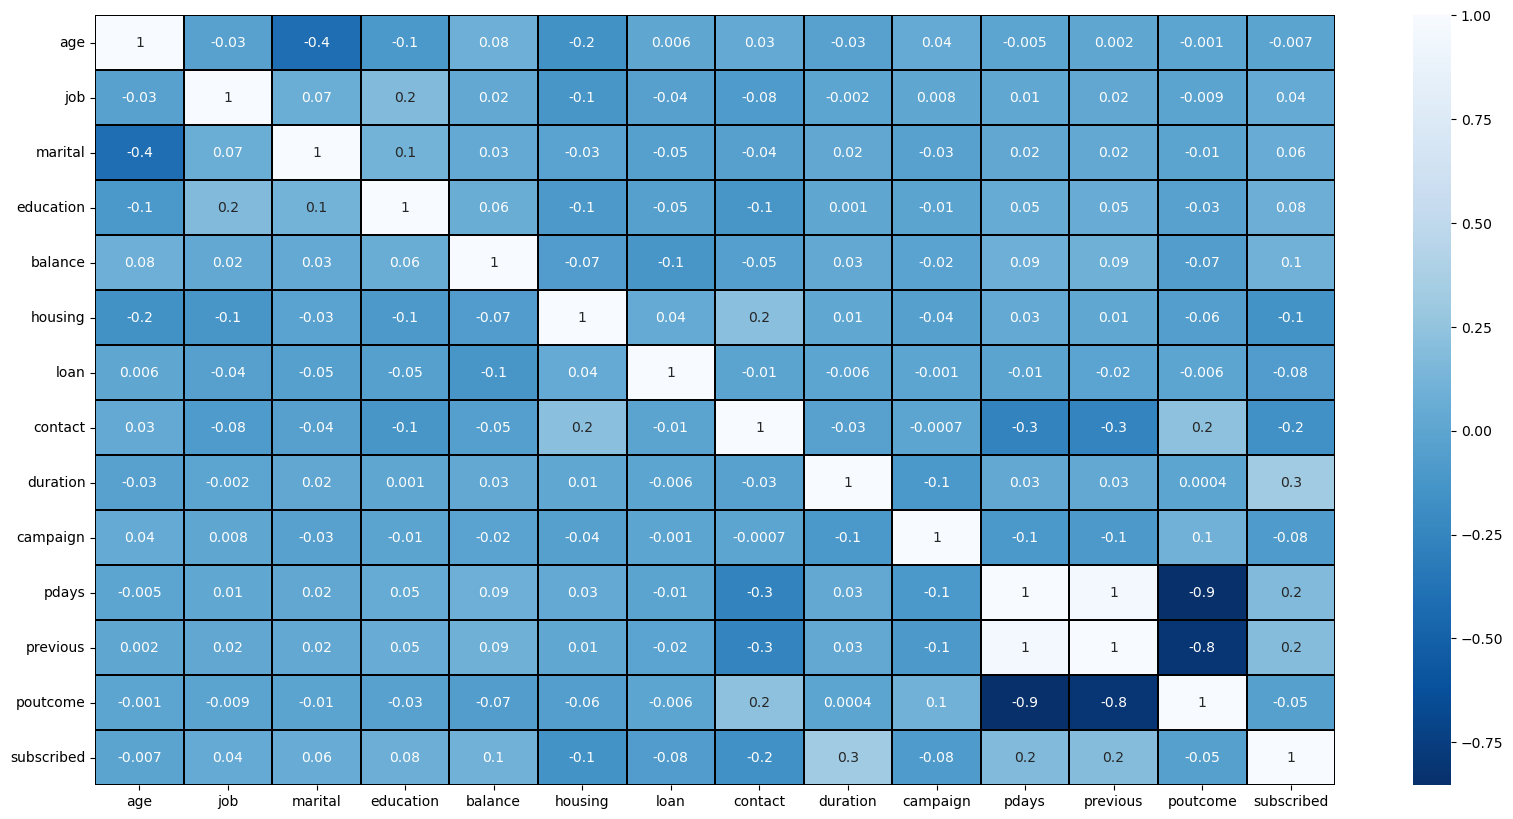

In [421]:
plt.figure (figsize = (20,10), facecolor = "white")
sns.heatmap(df3_new.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()


In [424]:
cor['subscribed'].sort_values(ascending=False)
# here we can see in the correltion of all independent vaules with Target Column = 'subscribed'
#  there no such any huge correation with target column.

subscribed    1.000000
duration      0.325544
previous      0.190483
pdays         0.168602
balance       0.095734
education     0.075855
marital       0.056722
job           0.037552
age          -0.006545
poutcome     -0.048021
loan         -0.075136
campaign     -0.082439
housing      -0.149084
contact      -0.159186
Name: subscribed, dtype: float64

DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE =============================================================================================================================

In [426]:
df3_new.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'subscribed'],
      dtype='object')

In [427]:
x = df3_new[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',]]


In [428]:
y = df3_new[['subscribed']]

# here we are taking 'subscribed' as oue TARGET COLUMN.

In [429]:
x.shape

(27584, 13)

In [430]:
y.shape

(27584, 1)

 APPLYING SCALING TECHNIQUES ==================================================================================================================>>>>>>

In [ ]:
# here we need to apply scaling techniques on our dataset, because by scaling techniques we normalise the values.
#  we can't apply SCALING TECHNIQUES on TARGET VARIABLE
#  to aplly scaling techinuque we need to import some libraries first.

In [432]:
from sklearn.preprocessing import StandardScaler

In [433]:
st = StandardScaler()

In [434]:
x = st.fit_transform(x)
x

array([[ 1.51966919, -1.32228288, -0.27903433, ..., -0.40022989,
        -0.39602811,  0.34317029],
       [-0.9575818 ,  2.02176653, -0.27903433, ..., -0.40022989,
        -0.39602811,  0.34317029],
       [-1.35394196,  0.80574856, -0.27903433, ..., -0.40022989,
        -0.39602811,  0.34317029],
       ...,
       [-1.15576188, -0.10626491,  1.3744314 , ..., -0.40022989,
        -0.39602811,  0.34317029],
       [ 1.22239907, -0.10626491, -1.93250006, ..., -0.40022989,
        -0.39602811,  0.34317029],
       [-0.85849176, -0.10626491,  1.3744314 , ..., -0.40022989,
        -0.39602811,  0.34317029]])

In [435]:
xf = pd.DataFrame(data=x)
print(xf)

# here we get our dataset (xf) after applying SCALING TECHING (STANDARD SCALER)

             0         1         2         3         4         5         6   \
0      1.519669 -1.322283 -0.279034  2.374747  0.846574 -1.109257 -0.440582   
1     -0.957582  2.021767 -0.279034 -0.302260 -0.969735 -1.109257 -0.440582   
2     -1.353942  0.805749 -0.279034 -0.302260  0.379198  0.901504 -0.440582   
3      1.618759 -0.106265 -1.932500  1.036243  1.244238 -1.109257 -0.440582   
4     -0.957582  1.413758 -0.279034 -0.302260 -0.396474  0.901504 -0.440582   
...         ...       ...       ...       ...       ...       ...       ...   
27579  0.231499 -0.106265  1.374431 -0.302260  1.162209 -1.109257 -0.440582   
27580 -0.363042  1.413758  1.374431  1.036243  0.596280 -1.109257 -0.440582   
27581 -1.155762 -0.106265  1.374431  1.036243 -1.207561  0.901504 -0.440582   
27582  1.222399 -0.106265 -1.932500  1.036243 -0.013171 -1.109257  2.269725   
27583 -0.858492 -0.106265  1.374431  1.036243 -0.089146 -1.109257 -0.440582   

             7         8         9         10      

In [436]:
xf.columns

RangeIndex(start=0, stop=13, step=1)

In [438]:
xf.shape

(27584, 13)

In [437]:
df3_new.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'subscribed'],
      dtype='object')

In [439]:
column = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

In [440]:
xf.columns = column

In [441]:
xf.head(2)

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,1.519669,-1.322283,-0.279034,2.374747,0.846574,-1.109257,-0.440582,0.362292,-1.436312,-0.064895,-0.40023,-0.396028,0.34317
1,-0.957582,2.021767,-0.279034,-0.302260,-0.969735,-1.109257,-0.440582,-0.734204,-0.816578,-0.064895,-0.40023,-0.396028,0.34317


In [442]:
# similarly for target column

In [443]:
yf=y

In [444]:
yf.head(2)

,subscribed
0,0
1,0


FINDING MULTICOLINEARITY ======================================================================================================================

In [446]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [447]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

In [448]:
# here we are making "def function" for calculating VIF
def calc_vif(xf):
    vif = pd.DataFrame()
    vif["FETURES"] = xf.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf.values,i) for i in range (xf.shape[1])]
    return (vif)

In [449]:
xf.shape

(27584, 13)

In [450]:
yf.shape

(27584, 1)

In [451]:
calc_vif(xf)
# here we didn't find MULTICOLINEARITY between the independent Columns.

,FETURES,VIF FACTOR
0,age,1.271619
1,job,1.048153
2,marital,1.230728
3,education,1.068174
4,balance,1.043576
5,housing,1.131662
6,loan,1.023264
7,contact,1.155287
8,duration,1.015928
9,campaign,1.026137


In [452]:
# here we can see that the highest VIF values are 15.12 & 12.34 for 'pdays' & 'previous'
#  we can drop 'pdays' & 'previous' column
#  but before droping those column, we need to chek the correlation of the column with the "TARGET COLUMN"

In [453]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.325544
previous      0.190483
pdays         0.168602
balance       0.095734
education     0.075855
marital       0.056722
job           0.037552
age          -0.006545
poutcome     -0.048021
loan         -0.075136
campaign     -0.082439
housing      -0.149084
contact      -0.159186
Name: subscribed, dtype: float64

In [454]:
#  out of 'pdays' & 'previous' , 'pdays' having less correlation with the target column, as compared to 'previous'
# so we can drop 'pdays'

In [455]:
xf.drop(['pdays'],axis=1,inplace=True)

In [456]:
xf.shape

(27584, 12)

In [457]:
calc_vif(xf)
# here we are again checking VIF for the remaining columns
# here we can clearly seen the difference between the VIF values of earlier and now.

,FETURES,VIF FACTOR
0,age,1.271403
1,job,1.048135
2,marital,1.230717
3,education,1.068098
4,balance,1.043555
5,housing,1.128807
6,loan,1.023190
7,contact,1.151188
8,duration,1.015791
9,campaign,1.025244


RESAMPLING (APPLYING SMOTE) ========================================================================================================

In [ ]:
# Here we know that our Target Column is a Categorical column. which is having values from 0-1.
# so we have to chek the distribution of values are equal or not, offcourse i would be not, so we have to make them equally
#  'equally balanced distributed' for better results.

# SOLVING CLASS IMMBALANCE PROBLEM BY SMOTE TECHNIQUE.

In [459]:
yf.value_counts()
# here we can see that the CLASS IMMBALANCE PROBLEM
# every category is having different values.

subscribed
0             24762
1              2822
dtype: int64

In [460]:
# To solve this prolem we need import SMOTE LIBRARY from the IMBLEARN.

In [461]:
from imblearn.over_sampling import SMOTE

In [462]:
smt = SMOTE()

In [463]:
train_x, train_y = smt.fit_resample(xf,yf)

In [464]:
train_y.value_counts()
# here as you can see below the immbalancenes is cleared now.

subscribed
0             24762
1             24762
dtype: int64

In [465]:
train_x.shape

(49524, 12)

In [466]:
train_y.shape

(49524, 1)

In [467]:
# Now here our both INDEPENDENT VALUES & DEPENDENT VALUES are BALANCED.

================  UPTO HERE EDA AND OTHER TECHINIQUES ARE COMPLETED ==================================

APPLYING ML MODEL ========================================================================================================

In [470]:
from sklearn.model_selection import train_test_split

In [471]:
 x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.20,random_state=42)

In [472]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [473]:
lg = LogisticRegression()
# gnb = GaussianNB()
# svc = SVC()
# dtc = DecisionTreeClassifier()
# knn = KNeighborsClassifier()

In [474]:
# ml_model = [lg,gnb,svc,dtc,knn]

In [477]:
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
y_pred = lg.predict(x_train)
    
print('Accuracy Score of ', lg ,'is:')
print (accuracy_score(y_train,ipred))
    
print(confusion_matrix(y_train,ipred))
print(classification_report(y_train,ipred))
print('\n')


Accuracy Score of  LogisticRegression() is:
0.7696812135591509
[[14758  5138]
 [ 3987 15736]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     19896
           1       0.75      0.80      0.78     19723

    accuracy                           0.77     39619
   macro avg       0.77      0.77      0.77     39619
weighted avg       0.77      0.77      0.77     39619





In [478]:
# for i in ml_model:
#     i.fit(x_train,y_train)
#     i.score(x_train,y_train)
#     ipred = i.predict(x_train)
    
#     print('Accuracy Score of ', i,'is:')
#     print (accuracy_score(y_train,ipred))
    
#     print(confusion_matrix(y_train,ipred))
#     print(classification_report(y_train,ipred))
#     print('\n')


In [479]:
final_model = LogisticRegression()

In [480]:
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(accuracy_score(y_test,final_model_pred))
print(confusion_matrix(y_test,final_model_pred))
print(classification_report(y_test,final_model_pred))

0.81110550227158
[[3888  978]
 [ 893 4146]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4866
           1       0.81      0.82      0.82      5039

    accuracy                           0.81      9905
   macro avg       0.81      0.81      0.81      9905
weighted avg       0.81      0.81      0.81      9905



In [ ]:
# HERE ABOVE WE CAN FIND THE ACCURACY OF OUR MODEL ID = 81 %

SAVING MODEL ===================================================================================================================

In [482]:
import pickle

In [485]:
file_name = 'BANK MARKETTING.pkl' 
pickle.dump(final_model,open(file_name,'wb'))

==================================================  FINISHED  =============================================================